# Getting and Cleaning Data

In [1]:
# Get beer reviews data from Prof. Julian McAuley's website (UC San Diego)
# http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json
import numpy as np
import urllib.request

def parseData(fname):
  for l in urllib.request.urlopen(fname):
    yield eval(l)
# Yield is a keyword that is used like return, except the function will return a generator.
# Refer - http://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do-in-python for more details on this keyword

print ("Reading data...")
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print ("done")

Reading data...
done


In [2]:
# 'data' variable now contains JSON data
data[1]

{'beer/ABV': 6.2,
 'beer/beerId': '48213',
 'beer/brewerId': '10325',
 'beer/name': 'Red Moon',
 'beer/style': 'English Strong Ale',
 'review/appearance': 3.0,
 'review/aroma': 2.5,
 'review/overall': 3.0,
 'review/palate': 3.0,
 'review/taste': 3.0,
 'review/text': 'Dark red color, light beige foam, average.\tIn the smell malt and caramel, not really light.\tAgain malt and caramel in the taste, not bad in the end.\tMaybe a note of honey in teh back, and a light fruitiness.\tAverage body.\tIn the aftertaste a light bitterness, with the malt and red fruit.\tNothing exceptional, but not bad, drinkable beer.',
 'review/timeStruct': {'hour': 13,
  'isdst': 0,
  'mday': 1,
  'min': 44,
  'mon': 3,
  'sec': 57,
  'wday': 6,
  'yday': 60,
  'year': 2009},
 'review/timeUnix': 1235915097,
 'user/profileName': 'stcules'}

In [3]:
# Number of beer reviews that we have
len(data)

50000

In [4]:
# Number of features
# Does not count the number of sub-features (or nested features). E.g. - mday, min, mon, sec etc 
len(data[0])

14

# Visualize Data

In [5]:
# Restricting number of samples for simplicity and quick execution
import random
random.shuffle(data) # Shuffle the data so that we are more likely to get a true picture of the data
data = data[:5000]

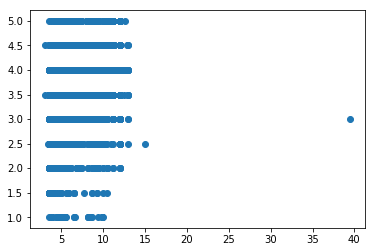

In [6]:
# Taking just two features and plotting them
# This will also give us an idea if the two features taken are somehow correlated

import matplotlib.pyplot as plt

x = [d['beer/ABV'] for d in data]
y = [d['review/overall'] for d in data]
plt.scatter(x,y) 
plt.show()

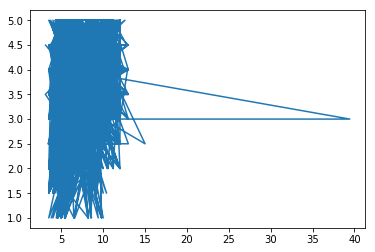

In [7]:
# We used scatter, because a normal plot wouldn't have made much sense
plt.plot(x,y) 
plt.show()

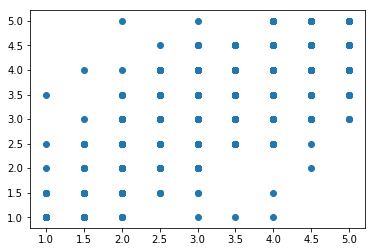

In [8]:
# Okay, so they were not correlated much.
# Taste should be a better indication of the overall rating, right?

x = [d['review/taste'] for d in data]
y = [d['review/overall'] for d in data]
plt.scatter(x,y)
plt.show()
# Bingo! More positive correlation than the last case for sure!

Let's assume that we need just ABV (Alcohol By Volume) and the overall beer rating

In [ ]:
# How scikit-learn expects data?
# X = input - set of features that we have
# y = output - the prediction that we need to make (can be real valued or discrete)
# e.g. - Given an email, predict spam (1) or not spam (0). Here X = email, y = spam/not spam: Classification Problem
# e.g. - Given area of the house in square feet, predict the price of the house
# X = area in square feet, y = Price: Regression Problem

In [9]:
# What if ABV values is missing from some reviews?
X = [d['beer/ABV'] if 'beer/ABV' in d else 5 for d in data] # Replace the value by 5 whereever ABV value is missing
y = [d['review/overall'] for d in data]

In [10]:
# Better would be to substitute by mean

# find the mean
sum_abv = 0.0
for d in data:
    if 'beer/ABV' in d:
        sum_abv += d['beer/ABV']
mean_abv = sum_abv/len(data)

X = [d['beer/ABV'] if 'beer/ABV' in d else mean_abv for d in data]
y = [d['review/overall'] for d in data]

Load data to Pandas Dataframe

In [11]:
import pandas

pd_df = pandas.DataFrame(data)
pd_df = pd_df[:5000]

In [13]:
pd_df.corr()

,beer/ABV,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
beer/ABV,1.000000,0.298047,0.402161,0.213024,0.364727,0.354051,0.248676,-0.076936,0.076936
review/appearance,0.298047,1.000000,0.552143,0.513950,0.552961,0.532301,0.074706,0.004347,-0.004347
review/aroma,0.402161,0.552143,1.000000,0.619029,0.623076,0.719666,0.118795,-0.047108,0.047108
review/overall,0.213024,0.513950,0.619029,1.000000,0.707736,0.793531,0.070238,-0.066917,0.066917
review/palate,0.364727,0.552961,0.623076,0.707736,1.000000,0.737102,0.094017,-0.056744,0.056744
review/taste,0.354051,0.532301,0.719666,0.793531,0.737102,1.000000,0.092397,-0.063502,0.063502
review/timeUnix,0.248676,0.074706,0.118795,0.070238,0.094017,0.092397,1.000000,-0.208158,0.208158
user/ageInSeconds,-0.076936,0.004347,-0.047108,-0.066917,-0.056744,-0.063502,-0.208158,1.000000,-1.000000
user/birthdayUnix,0.076936,-0.004347,0.047108,0.066917,0.056744,0.063502,0.208158,-1.000000,1.000000


In [ ]:
# Check if there are any values of ABV which are null/empty/NaN
null_cols = pandas.isnull(pd_df['beer/ABV'])
print (np.sum(null_cols == True))

In [ ]:
# No review with invalid ABV value!

In [ ]:
# What about reviewer's age?
null_cols = pandas.isnull(pd_df['user/ageInSeconds'])
print (np.sum(null_cols == True))

In [ ]:
# short demonstration on how to handle missing data before we use it on Beer reviews data

import pandas as pd

# Dictionary with data of few famous TV series characters
dict = {"name": ["Jon", "Penny", "Ross", "Sansa"],
       "age": [25, 33, 41, None], # Note the 'None' here
       "gender": ['M', 'F', 'M', 'F'] }

tv_chars = pd.DataFrame(dict)
print (tv_chars)

In [ ]:
tv_chars.fillna(tv_chars.mean())
# takes the mean of ages and puts it as Sansa's age!

In [ ]:
# Or you can interpolate!

dict = {"name": ["Jon", "Penny", "Ross", "Sansa"],
       "age": [25, 33, 41, None], # Note the 'None' here
       "gender": ['M', 'F', 'M', 'F'] }

tv_chars = pd.DataFrame(dict)
tv_chars.fillna(tv_chars.interpolate())

# Note - output can be different than the one using mean()

In [ ]:
# Back to the Beer reviews data we were looking at

# Fill NA/NaN values using the specified method
pd_df.fillna(0)
# This method works in most cases, but should be avoided. Better ways to deal with null values are:
# -> Fill with that column's mean
# -> Drop the row altogether (provided null values constitute a small subset of the total sample size)

In [ ]:
# Filling with column's mean
pd_df.fillna(pd_df.mean())

In [ ]:
# Seaborn is an interesting library which allows us to plot confusion matrices and heatmaps
import seaborn as sns

# Get all correlations
corr = pd_df.corr()
# Plot the heatmap
corr_plot = sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values).get_figure()
# Save the figure on disk and view it
corr_plot.savefig('./correlation_matrix.png', dpi=1024, bbox_inches='tight')

In [ ]:
# Create example dataset of normally distributed data. 
df= pd.DataFrame({'Data':np.random.normal(size=200)})  

# keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
df[np.abs(df.Data-df.Data.mean())<=(3*df.Data.std())] 

# or if you prefer the other way around
df[~(np.abs(df.Data-df.Data.mean())>(3*df.Data.std()))] 

In [ ]:
import scipy
import scipy.stats
from scipy.stats import ttest_ind

data = {'Category': ['cat2','cat1','cat2','cat1','cat2','cat1','cat2','cat1','cat1','cat1','cat2'],
        'values': [1,2,3,1,2,3,1,2,3,5,1]}
my_data = pd.DataFrame(data)
my_data.groupby('Category').mean()

# Finding p-values
cat1 = my_data[my_data['Category']=='cat1']
cat2 = my_data[my_data['Category']=='cat2']

ttest_ind(cat1['values'], cat2['values'])

In [ ]:
# Finding percentiles 

a = np.array([[10, 7, 4], [3, 2, 1]])
print (a)

In [ ]:
np.percentile(a, 50)

In [ ]:
np.percentile(a, 50, axis=0)

In [ ]:
np.percentile(a, 50, axis=1)

In [ ]:
np.percentile(a, 50, axis=1, keepdims=True)

In [ ]:
# Quantiles
from pandas import DataFrame
df = DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                   columns=['a', 'b'])
print (df)
df.quantile(.1)
df.quantile([.1, .5])